# 3 kinetic stages, 2 build-up regimes

_Produces Figure 5_

### Import packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from bamboost import Manager
from pranzo import Analyzer

### Specify the path to the database

The database can be downloaded from the [ETH Research Collection](https://www.research-collection.ethz.ch/)

In [2]:
database_path = ('../out')

db = Manager(database_path)

### Generate the figure

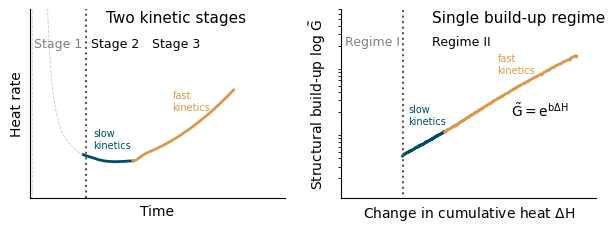

In [3]:
# figure design
fig_3stages_2regimes = plt.figure()
fig_3stages_2regimes.set_size_inches(180/25.4, 60/25.4) # in mm

lft=0.1 #left limit
rgt=0.9 #right limit
bot=0.1 #bottom limit
top=0.9 #top limit

width = 0.36
height= 1

# axis h-t 
gs1 = gridspec.GridSpec(1,1)
gs1.update(left=lft, right=lft+width, bottom=bot, top=top)
ax_ht = plt.subplot(gs1[0,0])
ax_ht.set_xticks([])
ax_ht.set_yticks([])

# axis Gtilde-DH 
gs2 = gridspec.GridSpec(1,1)
gs2.update(left=rgt-width, right=rgt, bottom=bot, top=top)
ax_GtildeDH = plt.subplot(gs2[0,0])
ax_GtildeDH.set_xticks([])
ax_GtildeDH.set_yticks([])

# remove the default contour of the axis
for ax in [ax_ht, ax_GtildeDH]:
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')

# read the data
opc36 = db['opc36']
a = Analyzer(opc36)

calo = a.calo
rheo = a.rheo.phase('p2')

t = np.linspace(0, 4*3600, 4*3600+1)
h = calo.interpolate('norm_heat_flow_Wpgbinder', t)
H = calo.interpolate('norm_heat_Jpgbinder', t)
G = rheo.interpolate('storage_modulus_Pa', t, cutoff=0.012)

# set bounds and colors
nd_data = 13800
idx_bump = 7300
idx_grey = 3800
idx_slow = idx_bump

c_grey = '#c6c6c6'
c_slow = '#004c6d'
c_fast = '#dd9748'
c_vlines = '#575757'

lwidth = 2

# plot h-t
ax_ht.plot(t[:idx_grey]*a.nft, h[:idx_grey]*a.nfh, c=c_grey, lw=lwidth*0.3, ls='--')
ax_ht.plot(t[idx_grey:idx_slow]*a.nft, h[idx_grey:idx_slow]*a.nfh, c=c_slow, lw=lwidth)
ax_ht.plot(t[idx_slow:]*a.nft, h[idx_slow:]*a.nfh, c=c_fast, lw=lwidth)

# plot Gtilde-DH
idx_calonoise = list(t).index(3800)
idx_grey = idx_calonoise

DH = (H[idx_calonoise:nd_data]-H[idx_calonoise]) # compute DH, shift by idx_calonoise to have onset in DH space
Gtilde = G[idx_calonoise:nd_data]/G[idx_bump] # compute Gtilde from DH origin

ax_GtildeDH.semilogy(DH[:idx_slow-idx_calonoise], Gtilde[:idx_slow-idx_calonoise], c=c_slow, lw=lwidth)
ax_GtildeDH.semilogy(DH[idx_slow-idx_calonoise:], Gtilde[idx_slow-idx_calonoise:], c=c_fast, lw=lwidth)

# vlines to separate phase 2
ax_ht.vlines(4000*a.nft, 0, 100, color=c_vlines, ls=':')
ax_GtildeDH.vlines(DH[0], 0, 100, color=c_vlines, ls=':')

# set axes limits
ax_ht.set_xlim(0,5)
ax_ht.set_ylim(0,3)
ax_GtildeDH.set_xlim(-3.1, max(DH)+1)
ax_GtildeDH.set_ylim(0.1,70)

# hide axes ticks
ax_ht.set_xticks([])
ax_ht.set_yticks([])
ax_GtildeDH.set_xticks([])
ax_GtildeDH.set_yticks([])

# set axes labels
ax_ht.set_xlabel(rf"Time", fontsize=10)
ax_ht.set_ylabel(rf"Heat rate", fontsize=10)
ax_GtildeDH.set_xlabel(r"Change in cumulative heat $\Delta \mathrm{H}$", fontsize=10)
ax_GtildeDH.set_ylabel(r"Structural build-up log $\tilde{\mathrm{G}}$", fontsize=10)

# add text
ax_ht.text(0.08, 2.4, 'Stage 1', fontsize=9, color='grey')
ax_ht.text(1.2, 2.4, 'Stage 2', fontsize=9)
ax_ht.text(2.4, 2.4, 'Stage 3', fontsize=9)
ax_ht.text(1.25, 0.8, 'slow\nkinetics', fontsize=7, color=c_slow)
ax_ht.text(2.8, 1.4, 'fast\nkinetics', fontsize=7, color=c_fast)
ax_ht.text(1.5, 2.8, "Two kinetic stages", fontsize=11)

ax_GtildeDH.text(-2.9, 20, 'Regime I', fontsize=9, color='grey')
ax_GtildeDH.text(1.5, 20, 'Regime II', fontsize=9)
ax_GtildeDH.text(0.3, 1.3, 'slow\nkinetics', fontsize=7, color=c_slow)
ax_GtildeDH.text(4.8, 7.6, 'fast\nkinetics', fontsize=7, color=c_fast)
ax_GtildeDH.text(5.5, 1.7, r"$\mathrm{\tilde{G} = e^{b \Delta H}}$")
ax_GtildeDH.text(1.5, 45, r"Single build-up regime", fontsize=11)

# display figure
plt.show()